# Introduction

First of all, lets talk about the tool previewed, which is used in several papers, such as [this one
](https://link.springer.com/article/10.1007/s10994-018-5719-z).

It is called Tornado framework and is available on github [here](https://github.com/alipsgh/tornado).

It is recomended to use anaconda environment, since it contains several tools for machinelearning and datascience by default. Detailed description on how to get the framework working, can be found in the [framework describtion](https://github.com/alipsgh/tornado#readme)

If you dont want to use Anaconda, just make sure to have **numpy**, **scipy**, **pympler** and **matplotlib** installed.



## Installation Notes

First you have to download the Tornado framework from their github.
For the best experience, create a virtual environment with Python 3.6+ by executing following commands in the root directory of the framework. 
This step is important, since the framework is not written as a fully contained module that could be reference from outside.


```
cd "tornado/framework/directory"
python -m venv venv
source venv/bin/activate  # to enter the environment
```

After creating the environment, install jupyter, enable extension for google collab and start a notebook server with following commands

```
pip install jupyter
jupyter serverextension enable --py jupyter_http_over_ws
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8898 --NotebookApp.port_retries=0
```
After you have done this, you should be able to see a terminal message telling you that you can connect to the jupyter server through a localhost link. 

Use that link to connect to a local runtime in the google collab and you are good to go!


In [ ]:
! pip install numpy
! pip install scipy
! pip install pympler
! pip install matplotlib

The project path "projects/single/finaldatabm_gender-1.arff/20210809_215521/" is created.
data_streams/metabolomites-20210808/FinalDataBM_gender-1.arff
Reading line 766 
100.00% of instances are prequentially processed!
The stream is completely processed.
PR + FHDDM: 
	Classifier Error-rate: 40.30%
	Classifier Average Memory Usage (bytes): 145224.00
	Classifier Average Runtime (ms): 123.84
	Classifier Total Runtime (ms): 304.98
	Average Detection Memory Usage (bytes): 1768.00,
	Average Detection Runtime (ms): 0.83,
	Total Detection Runtime (ms): 2.25,
	Error-rate: 40.30
	Drift Points detected: [215]
THE END!

data_streams/metabolomites-20210808/FinalDataBM_gender-1.arff
Reading line 766 
100.00% of instances are prequentially processed!
The stream is completely processed.
PR + FHDDMS: 
	Classifier Error-rate: 41.44%
	Classifier Average Memory Usage (bytes): 145256.00
	Classifier Average Runtime (ms): 72.71
	Classifier Total Runtime (ms): 307.63
	Average Detection Memory Usage (bytes):

/var/tmp/xbajger/pv056-task2/plotter/performance_plotter.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


THE END!

data_streams/metabolomites-20210808/FinalDataBM_bcp-1.arff
Reading line 526 
100.00% of instances are prequentially processed!
The stream is completely processed.
PR + FHDDMS: 
	Classifier Error-rate: 33.11%
	Classifier Average Memory Usage (bytes): 145224.00
	Classifier Average Runtime (ms): 131.86
	Classifier Total Runtime (ms): 171.09
	Average Detection Memory Usage (bytes): 1944.00,
	Average Detection Runtime (ms): 5.77,
	Total Detection Runtime (ms): 12.88,
	Error-rate: 33.11
	Drift Points detected: [227]
THE END!

data_streams/metabolomites-20210808/FinalDataBM_bcp-1.arff
Reading line 526 
100.00% of instances are prequentially processed!
The stream is completely processed.
PR + CUSUM: 
	Classifier Error-rate: 34.47%
	Classifier Average Memory Usage (bytes): 145224.00
	Classifier Average Runtime (ms): 171.44
	Classifier Total Runtime (ms): 171.44
	Average Detection Memory Usage (bytes): 896.00,
	Average Detection Runtime (ms): 7.02,
	Total Detection Runtime (ms): 7.02

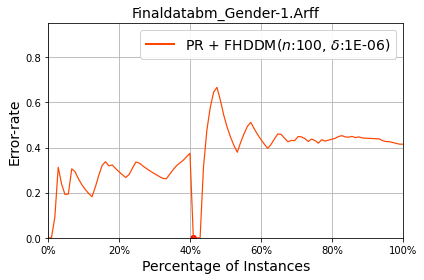

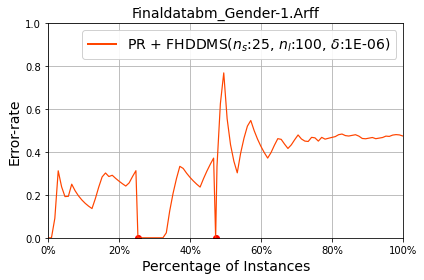

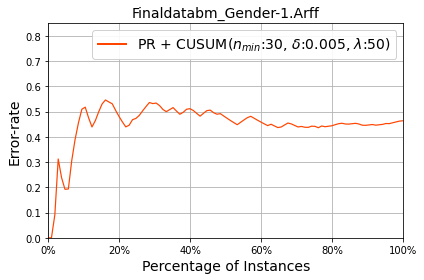

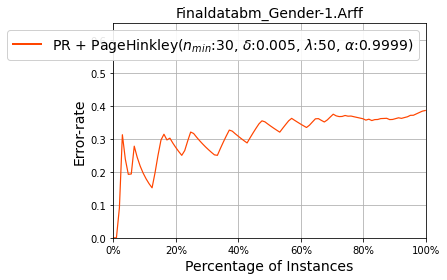

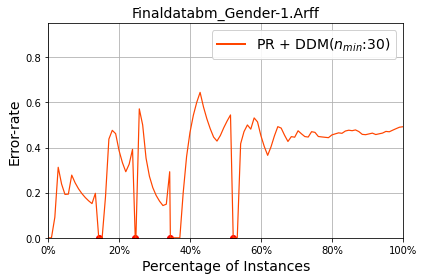

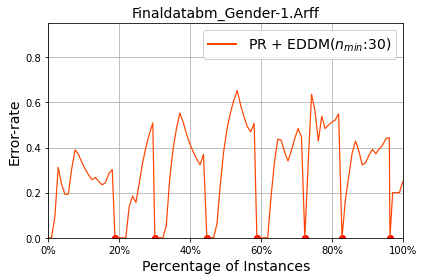

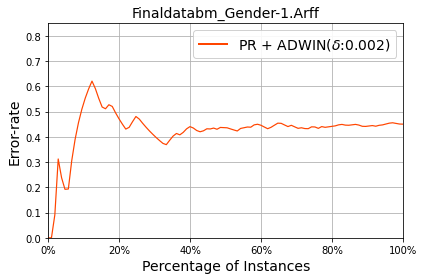

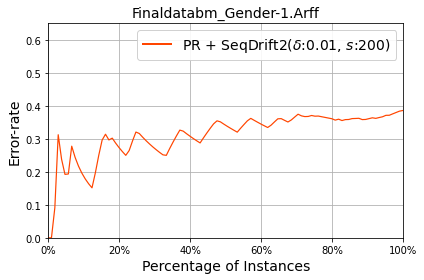

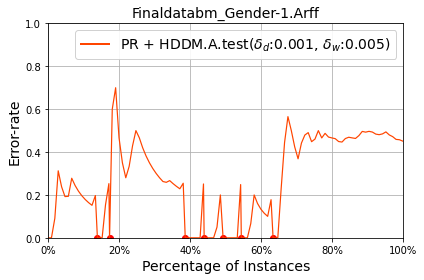

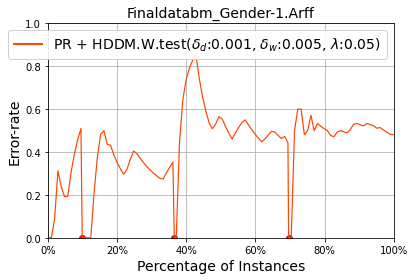

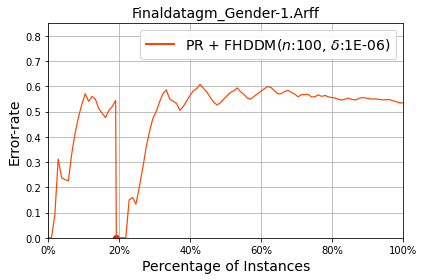

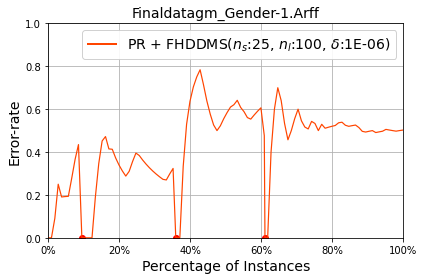

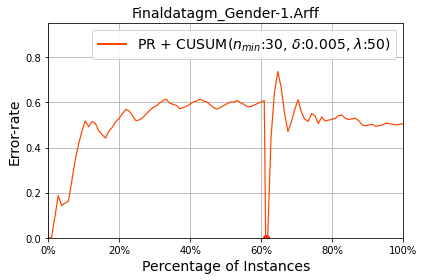

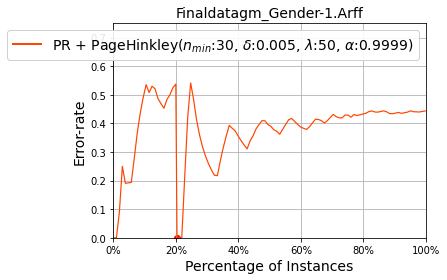

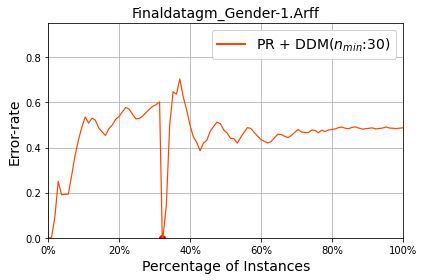

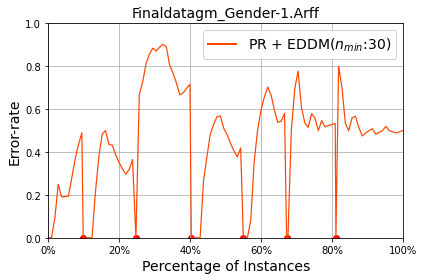

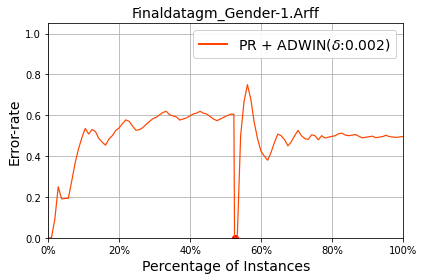

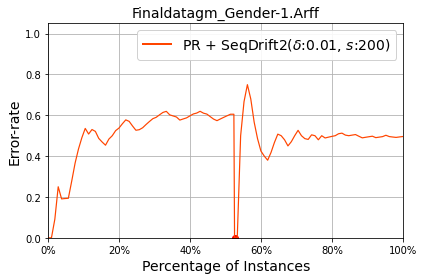

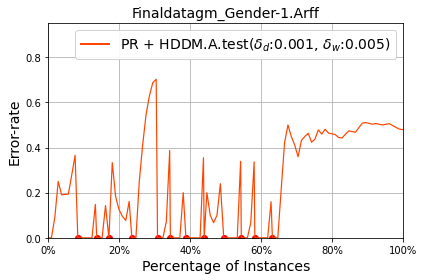

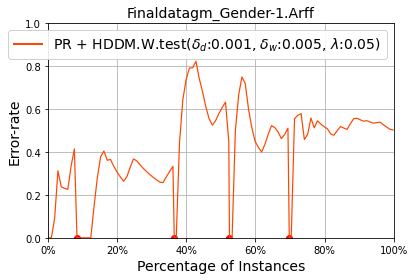

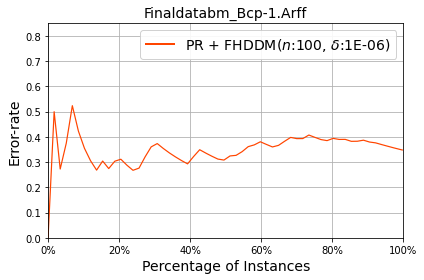

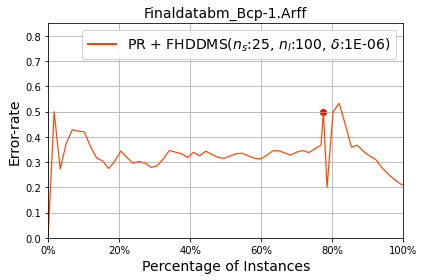

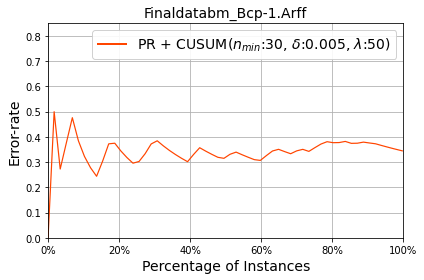

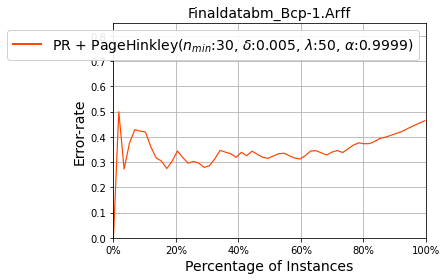

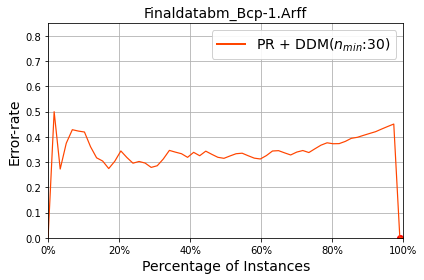

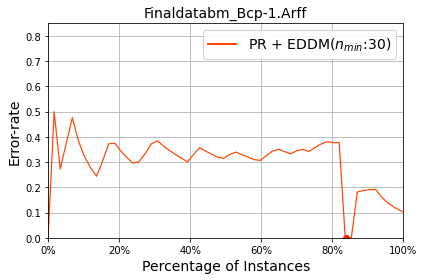

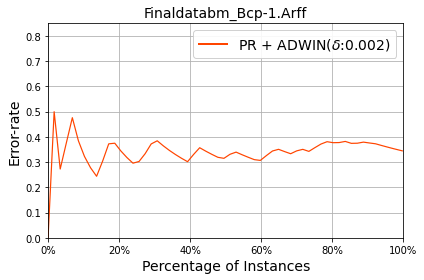

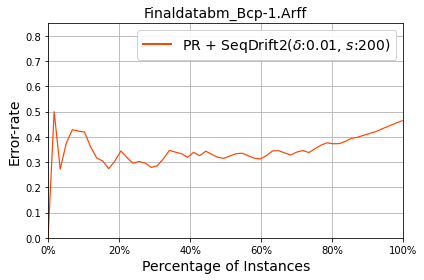

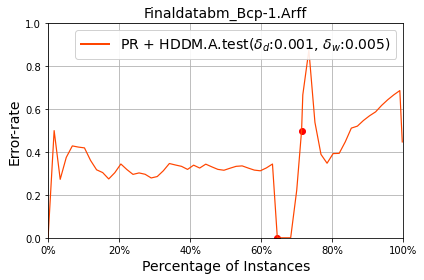

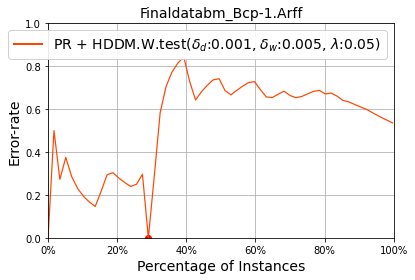

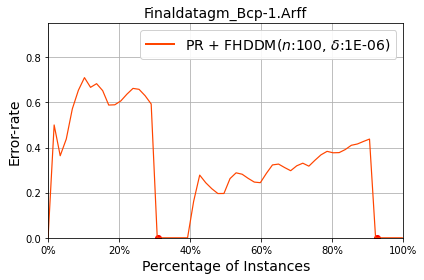

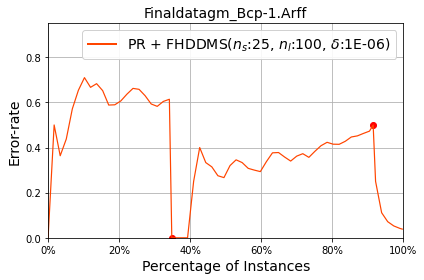

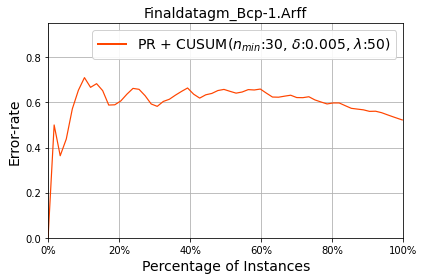

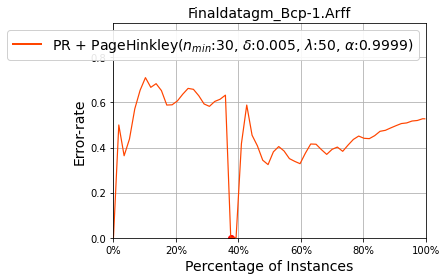

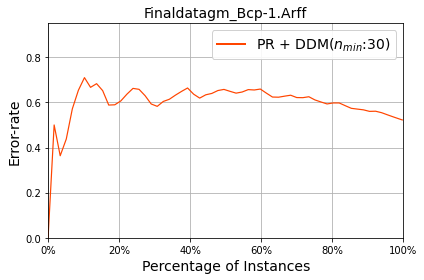

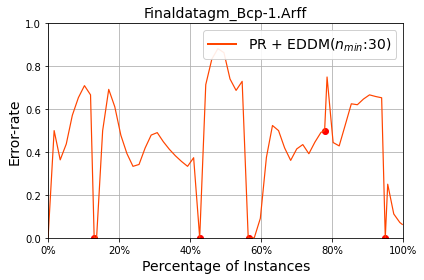

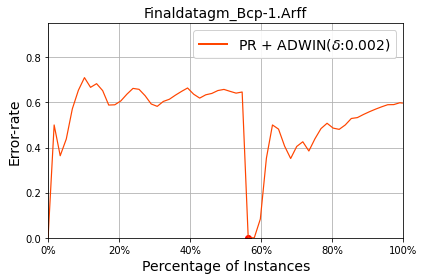

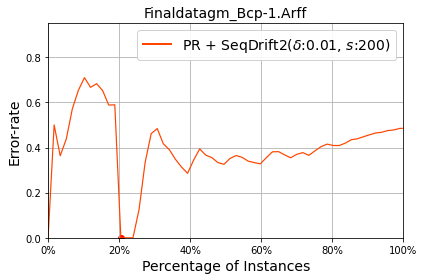

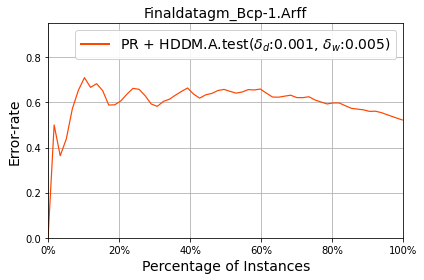

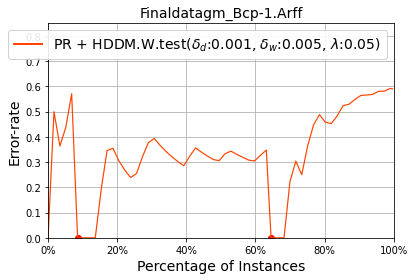

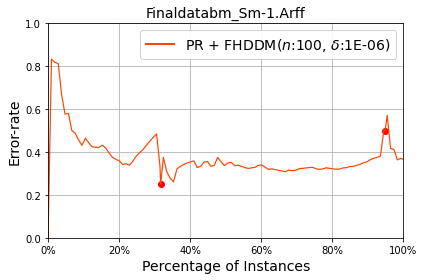

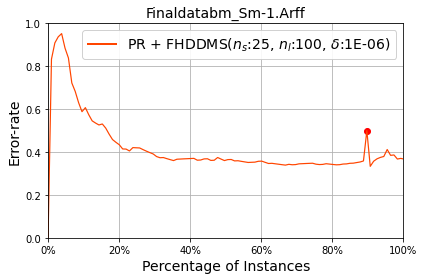

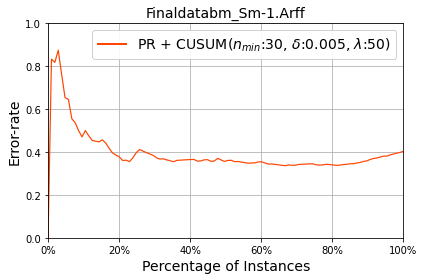

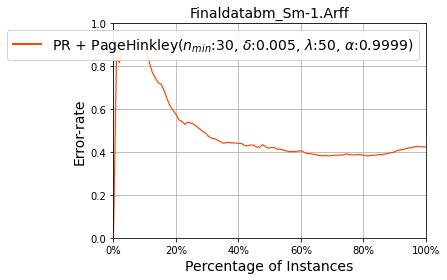

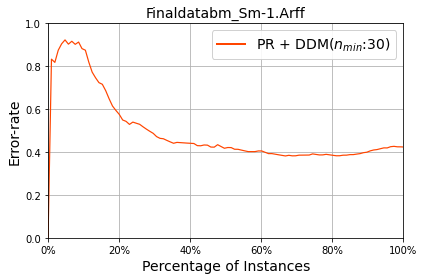

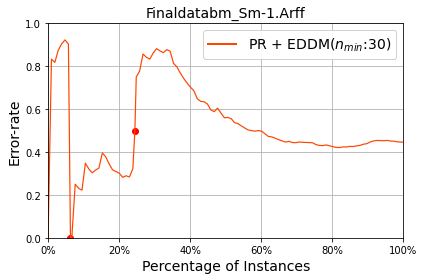

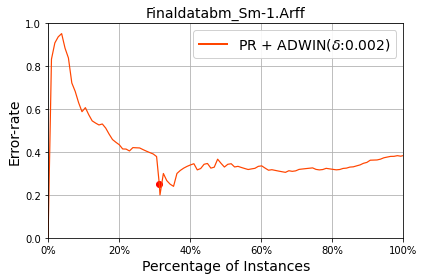

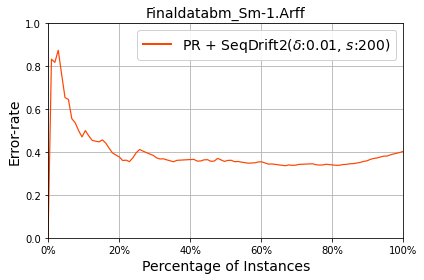

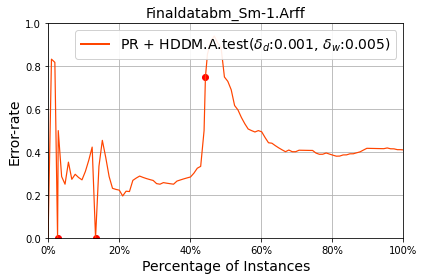

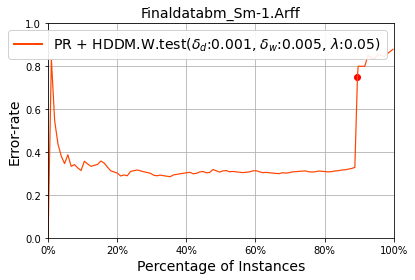

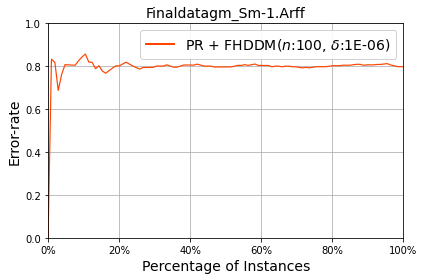

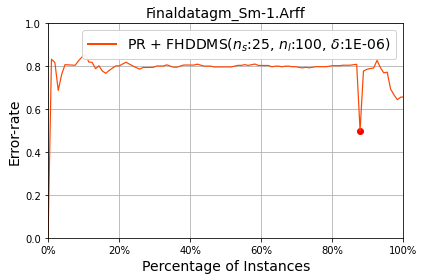

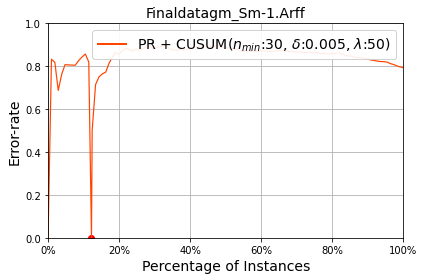

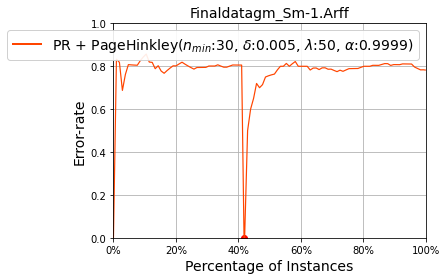

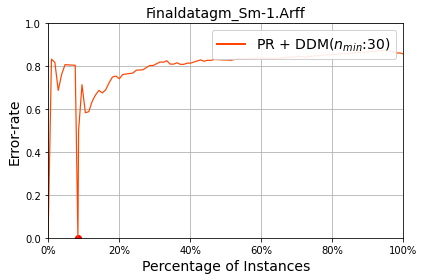

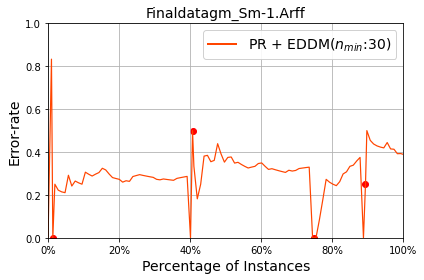

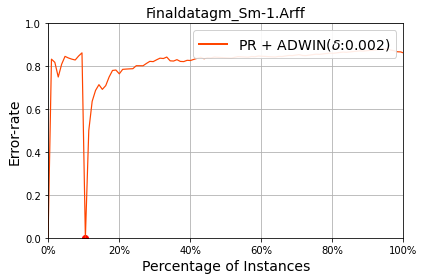

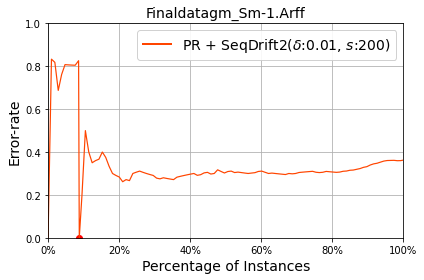

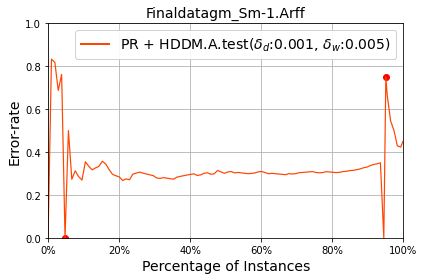

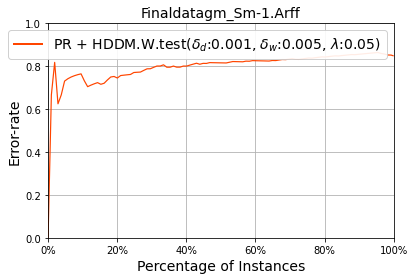

In [ ]:
from data_structures.attribute_scheme import AttributeScheme
from classifier.__init__ import *
from drift_detection.__init__ import *

from filters.project_creator import Project
from streams.readers.arff_reader import ARFFReader
from tasks.__init__ import *

import os

detectors = [FHDDM(), FHDDMS(), CUSUM(), PH(), DDM(), EDDM(),
             ADWINChangeDetector(), SeqDrift2ChangeDetector(),
             HDDM_A_test(), HDDM_W_test()
            ]
datasets = ["data_streams/metabolomites-20210808/FinalDataBM_gender-1.arff",
            "data_streams/metabolomites-20210808/FinalDataGM_gender-1.arff",
            "data_streams/metabolomites-20210808/FinalDataBM_bcp-1.arff",
            "data_streams/metabolomites-20210808/FinalDataGM_bcp-1.arff",
            "data_streams/metabolomites-20210808/FinalDataBM_sm-1.arff",
            "data_streams/metabolomites-20210808/FinalDataGM_sm-1.arff"]

for dataset in datasets:
  # 1. Creating a project
  # This is a directory, where the output images adn error rates are stored.
  project = Project("projects/single", os.path.basename(dataset).lower())
  for detector in detectors:
    # 2. Loading arff files for both datasets
    print(dataset)
    labels, attributes, stream_records = ARFFReader.read(dataset)
    attributes_scheme = AttributeScheme.get_scheme(attributes)

    learner = Perceptron(labels, attributes_scheme['numeric'])

    prequential1 = PrequentialDrift(learner, detector, attributes, attributes_scheme, project)

    prequential1.run(stream_records, random_seed=123, plot_every_nth_point=5)



#Overview

The framework was maintained by Ali Pesaranghader and some people he worked with on his papers on incremental learning and concept drift detection.

I highly recommend checking his [github page](https://alipsgh.github.io/), he is quite an interesting person.

Last major changes were made as far as two years ago.
That was the year, when Ali published his paper on the stacked FHDDM detectors and the framework hasn't been touched since.